In [4]:
import sys
import sys

# Get the parent directory
sys.path.append('../../../AUTOGRAD/')

from src.Helpers.DrawGraph import draw_dot
from src.Optimizers.optimizer import Optimizer
from src.Gradient.Gradient import Variable
from src.Regression.Logistic_Regression import LogisticRegression
from src.NNS.Activation_Functions import Activations

import math, random
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
%matplotlib inline

In [2]:
sys.pa

'/home/ramin/Documents/Teaching/autograd/AUTOGRAD/src/Regression'

### Load Data

In [2]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=10000, n_features=4, centers=2, cluster_std=1.005, random_state=40)

### Normalize Data

In [3]:
X = (X - X.mean(axis=0))/X.std(axis=0)

In [4]:
Y = y[:, np.newaxis]

### Initialize random w and b

In [70]:
w = [Variable(random.uniform(-1, 1), label=f"W{_}") for _ in range(X.shape[1])]
b = Variable(random.uniform(-1, 1), label="b")

# Calculate gradient using the Variable Class

### Always set the gradients to 0 at the beginning 

In [71]:
for parameter in w:
    parameter.grad = 0.0
    
b.grad = 0

In [72]:
import random
import math


# Define the weights, inputs, and bias
x = X[0]

y = Y[0] # Assuming y is a list or an array

# Forward pass
y_hat = sum((w_i * x_i for w_i, x_i in zip(w, x)), b)
activation_function = getattr(Activations, 'sigmoid')
output = activation_function(y_hat)
# Loss function
if y[0] == 1:
    loss = output.log()
else:
    loss = (1 - output).log()

loss = -loss
# Backward pass

loss.backward()

# Print gradients
print("Gradients for weights:")
for i, weight in enumerate(w):
    print(f"Gradient for {weight.label}: {weight.grad}")

print("Gradient for bias:")
print(f"Gradient for {b.label}: {b.grad}")


Gradients for weights:
Gradient for W0: 0.016058326758167072
Gradient for W1: -0.4796058833628078
Gradient for W2: 0.37736949770109424
Gradient for W3: -0.4065301177694186
Gradient for bias:
Gradient for b: 0.3361341307056241


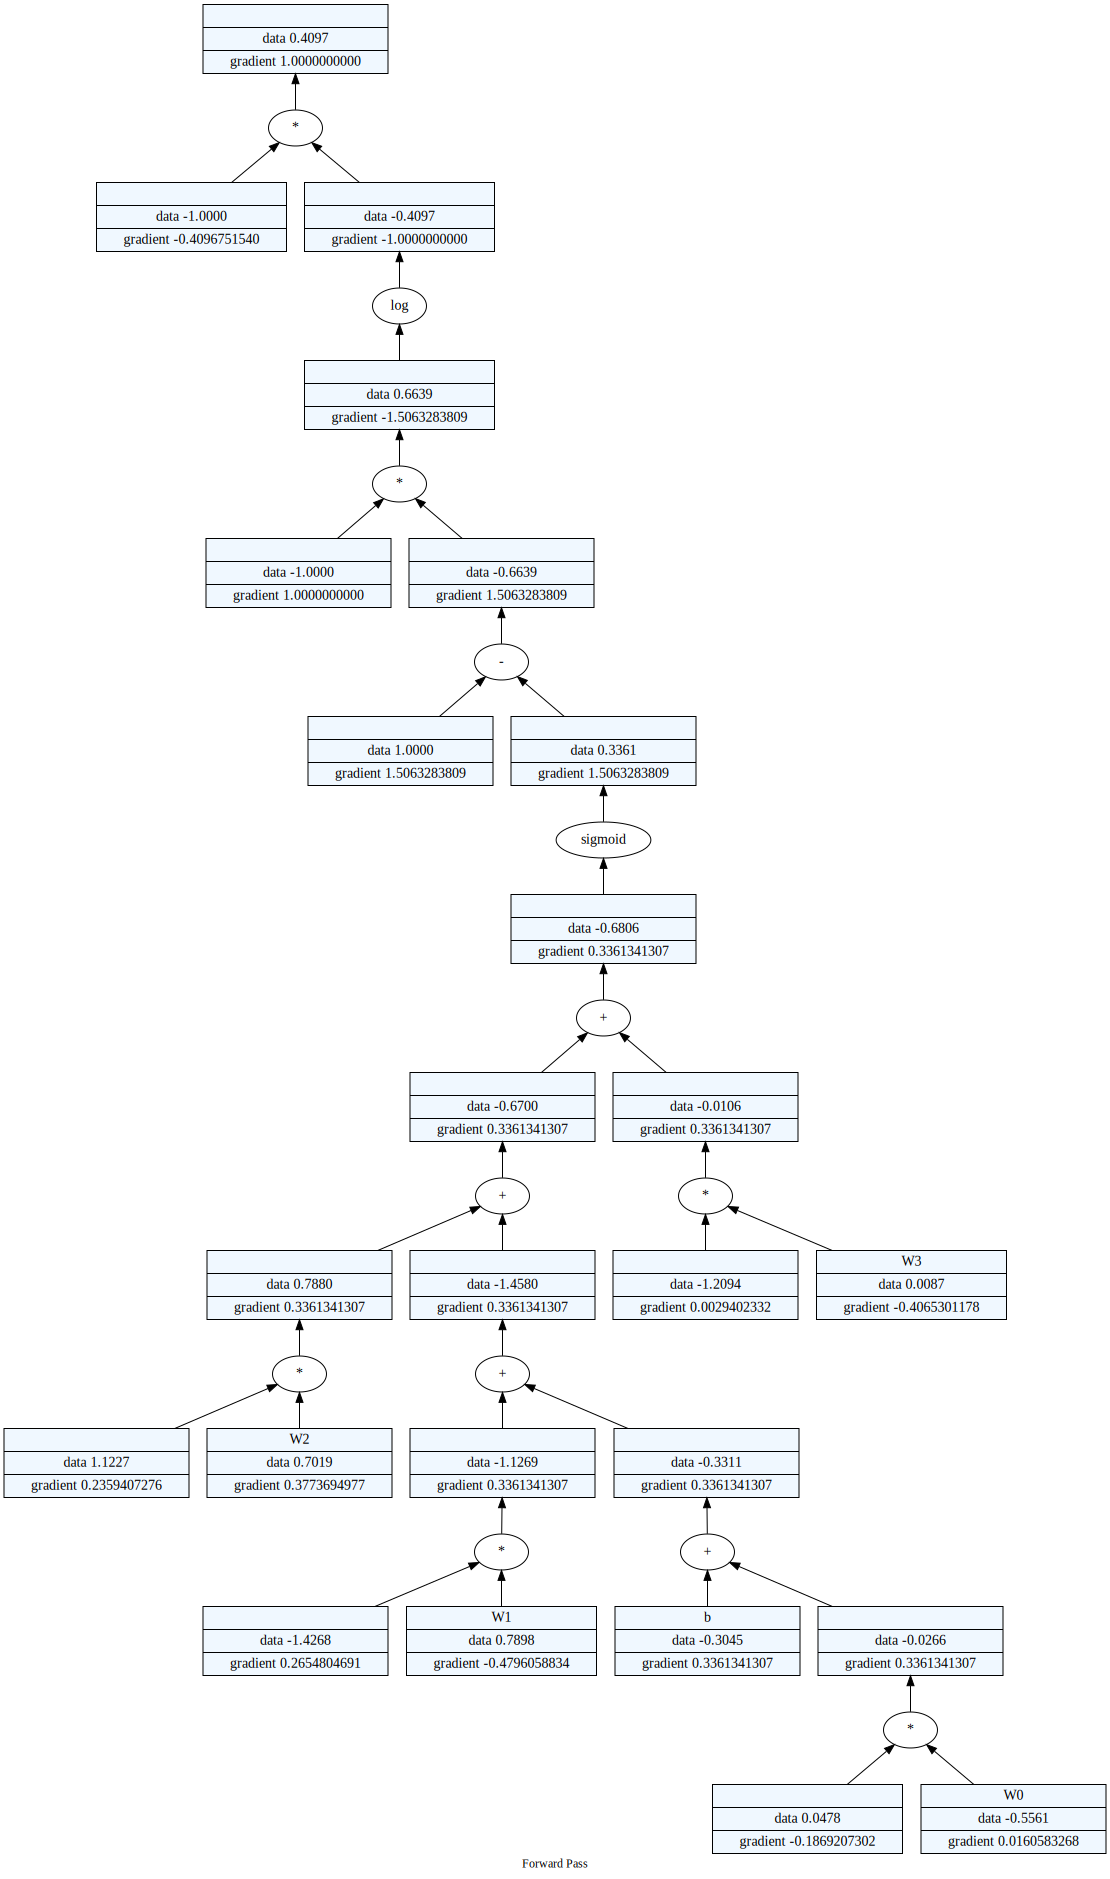

In [73]:
loss.__draw__()

### Calculate gradient manually to verify

In [74]:
for parameter in w:
    parameter.grad = 0.0
    
b.grad = 0

In [75]:
import numpy as np

# Given values
x = X[0]
y = Y[0]
w = [i.data for i in w]
b = b.data

# Logistic regression hypothesis function
h_theta_x = 1 / (1 + np.exp(-(np.dot(w, x) + b)))
loss_ = -y * math.log(h_theta_x) - (1 - y) * math.log(1 - h_theta_x)

# Gradients for weights
grad_w = (h_theta_x - y) * x

# Gradient for bias
grad_b = h_theta_x - y

# Print the gradients
print("Gradients for weights:")
print(grad_w)

print("\nGradient for bias:")
print(grad_b)


Gradients for weights:
[ 0.01605833 -0.47960588  0.3773695  -0.40653012]

Gradient for bias:
[0.33613413]


### Generate a LR model with Gradient Descent optimizer (SGD or Batch GD)

In [76]:
X.shape

(10000, 4)

In [77]:
Y.shape

(10000, 1)

In [78]:
lr = LogisticRegression(input_dim = 4)

In [79]:
lr.fit(X[:8000], Y[:8000], learning_rate=0.008, batch_size=32, num_epochs = 300, optimizer='SGD')

Epoch 0, Loss: 13.628387237994676
Epoch 10, Loss: 16.004686146942763
Epoch 20, Loss: 13.013536556565741
Epoch 30, Loss: 13.273654664223514
Epoch 40, Loss: 9.586612334904444
Epoch 50, Loss: 12.570221937095404
Epoch 60, Loss: 10.708532980869807
Epoch 70, Loss: 11.567761133384971
Epoch 80, Loss: 9.573847862228943
Epoch 90, Loss: 10.705798262734584
Epoch 100, Loss: 8.417724709970175
Epoch 110, Loss: 9.228769512145783
Epoch 120, Loss: 9.259473770818623
Epoch 130, Loss: 6.638905505600692
Epoch 140, Loss: 7.476584965626205
Epoch 150, Loss: 8.237540695728727
Epoch 160, Loss: 7.7301739165992895
Epoch 170, Loss: 6.845905663941766
Epoch 180, Loss: 7.657104558179513
Epoch 190, Loss: 6.5657105087076495
Epoch 200, Loss: 5.807087150748485
Epoch 210, Loss: 7.416237088457204
Epoch 220, Loss: 5.969554299527347
Epoch 230, Loss: 7.402631466010508
Epoch 240, Loss: 6.4541182436999796
Epoch 250, Loss: 5.987969042489248
Epoch 260, Loss: 5.443035011308655
Epoch 270, Loss: 5.014437286311612
Epoch 280, Loss: 4.5

In [80]:
lr.parameters()

[Variable(data=0.39035630386697745),
 Variable(data=0.7023478893347985),
 Variable(data=-1.1552715372687385),
 Variable(data=0.0709389344451374),
 Variable(data=0.15370963445813665)]

In [81]:
preds = lr.predict(X[8000:])

In [82]:
preds = [int(pred.data > 0.5) for pred in preds]

In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y[8000:], preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       977
           1       1.00      1.00      1.00      1023

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



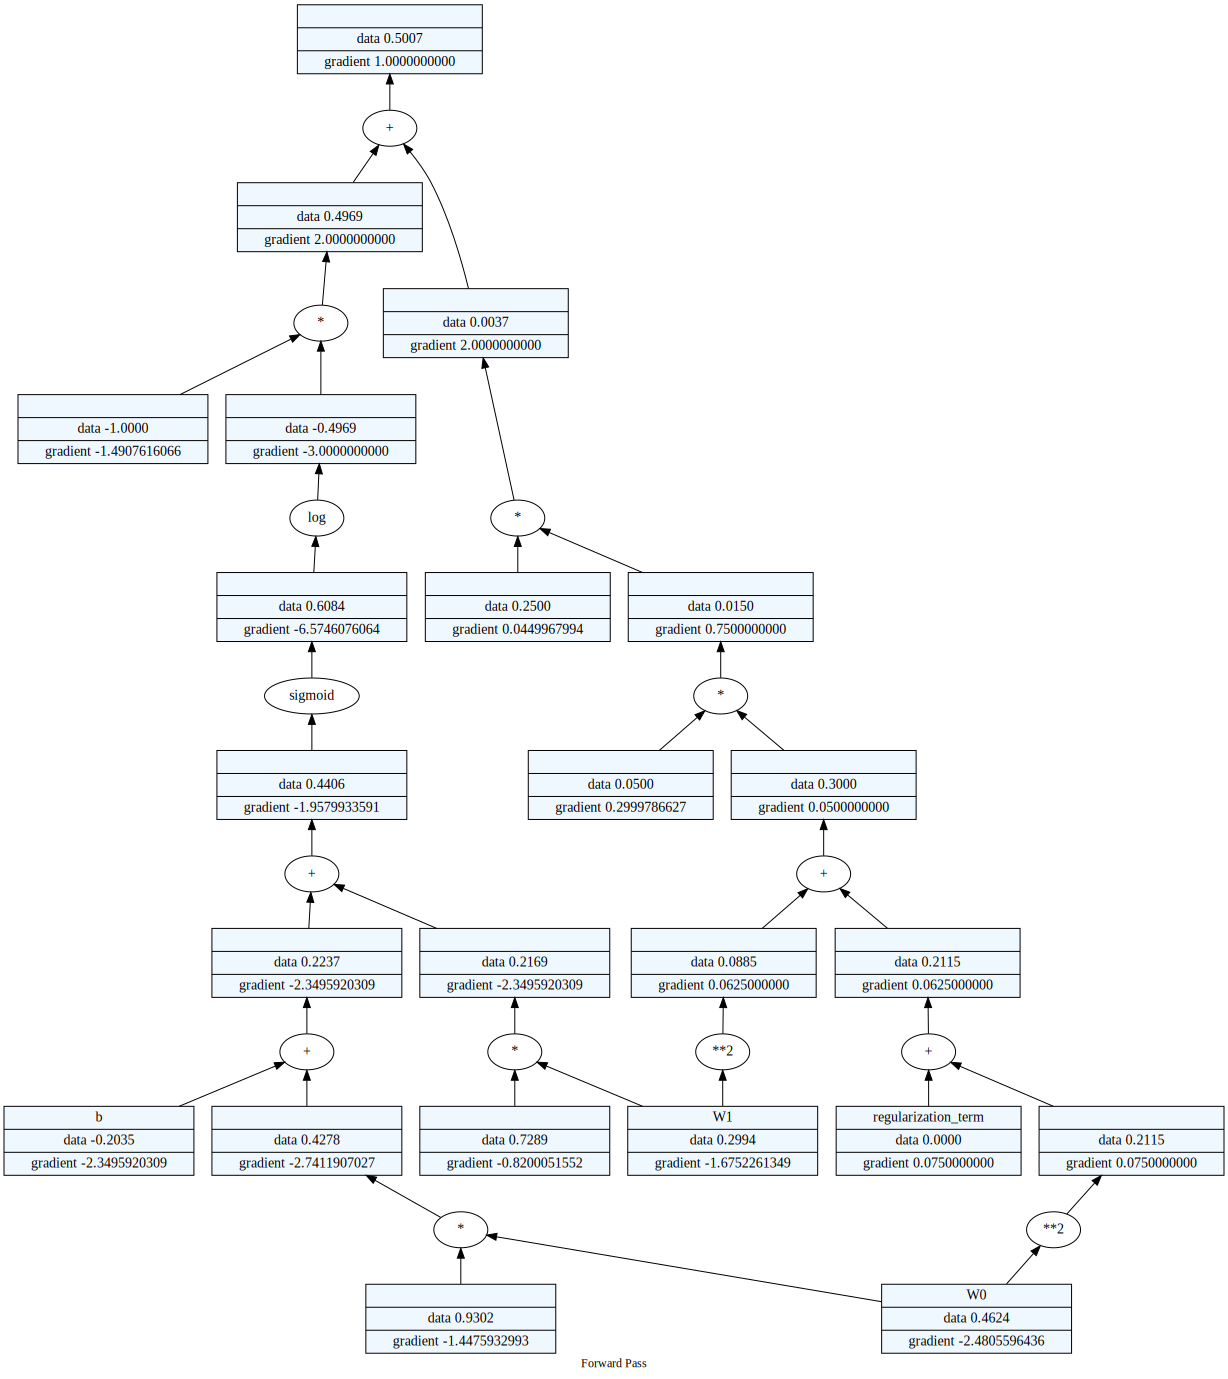

In [26]:
lr.loss.backward()
lr.loss.__draw__()

In [15]:
# lr.__draw__(X[0])

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create and fit a linear regression/ model
model = LogisticRegression()
model.fit(X[:8000], Y[:8000])

/home/ramin/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [88]:
model.coef_

array([[ 0.43513647,  2.88130106, -2.96293741,  3.59300855]])

In [89]:
preds = model.predict(X[8000:])

In [90]:
from sklearn.metrics import classification_report
print(classification_report(Y[8000:], preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       977
           1       1.00      1.00      1.00      1023

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



### Multiclass

In [1]:
import sys
import sys

# Get the parent directory
parent_directory = sys.path[0]  # Assumes the script is in the parent directory

# Add the parent directory to the Python path
sys.path.append(parent_directory)
from  src.Helpers.DrawGraph import draw_dot
from src.Optimizers.optimizer import Optimizer
from src.Gradient.Gradient import Variable
from src.Regression.Logistic_Regression import LogisticRegression
from src.NNS.Activation_Functions import Activations

import math, random
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
%matplotlib inline

In [2]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=1000, n_features=4, centers=4, cluster_std=1.005, random_state=40)

### Normalize Data

In [3]:
X = (X - X.mean(axis=0))/X.std(axis=0)

In [4]:
Y = y[:, np.newaxis]

### Initialize random w and b

In [5]:
input_dim = 4
k = 4

In [6]:
W = [[Variable(random.uniform(-1, 1), label=f"Class{k}_W{_}") for _ in range(input_dim)] for k in range(k)]
B = [Variable(random.uniform(-1, 1), label=f"Class{k}_b") for k in range(k)]

# Calculate gradient using the Variable Class

### Always set the gradients to 0 at the beginning 

In [7]:
import random
import math


# Define the weights, inputs, and bias
x = X[0]

y = Y[0] # Assuming y is a list or an array

# Forward pass
y_hat = [sum((w_i * x_i for w_i, x_i in zip(w, x)), b) for w, b in zip(W, B)]
activation_function = getattr(Activations, 'softmax')
output = activation_function(y_hat)

# Backward pass
for element in output:
    element.backward()
    
# Check gradients
for w_row in W:
    for w_i in w_row:
        print(f"Gradient for {w_i.label}: {w_i.grad}")

for b_i in B:
    print(f"Gradient for {b_i.label}: {b_i.grad}")

Gradient for Class0_W0: 0.1978754711229909
Gradient for Class0_W1: 0.26248759536253663
Gradient for Class0_W2: -0.31137258865324624
Gradient for Class0_W3: 0.23271276731211618
Gradient for Class1_W0: -0.003565041662619899
Gradient for Class1_W1: -0.004729131953938428
Gradient for Class1_W2: 0.005609872941031017
Gradient for Class1_W3: -0.004192691020180069
Gradient for Class2_W0: -0.11734664920113247
Gradient for Class2_W1: -0.155663759625422
Gradient for Class2_W2: 0.1846541651887223
Gradient for Class2_W3: -0.13800630929856963
Gradient for Class3_W0: -0.25053075421975773
Gradient for Class3_W1: -0.3323363672429744
Gradient for Class3_W2: 0.39422981047595074
Gradient for Class3_W3: -0.29463836412060196
Gradient for Class0_b: 0.20397819069058173
Gradient for Class1_b: -0.00367499187216469
Gradient for Class2_b: -0.12096576221300169
Gradient for Class3_b: -0.258257426592959


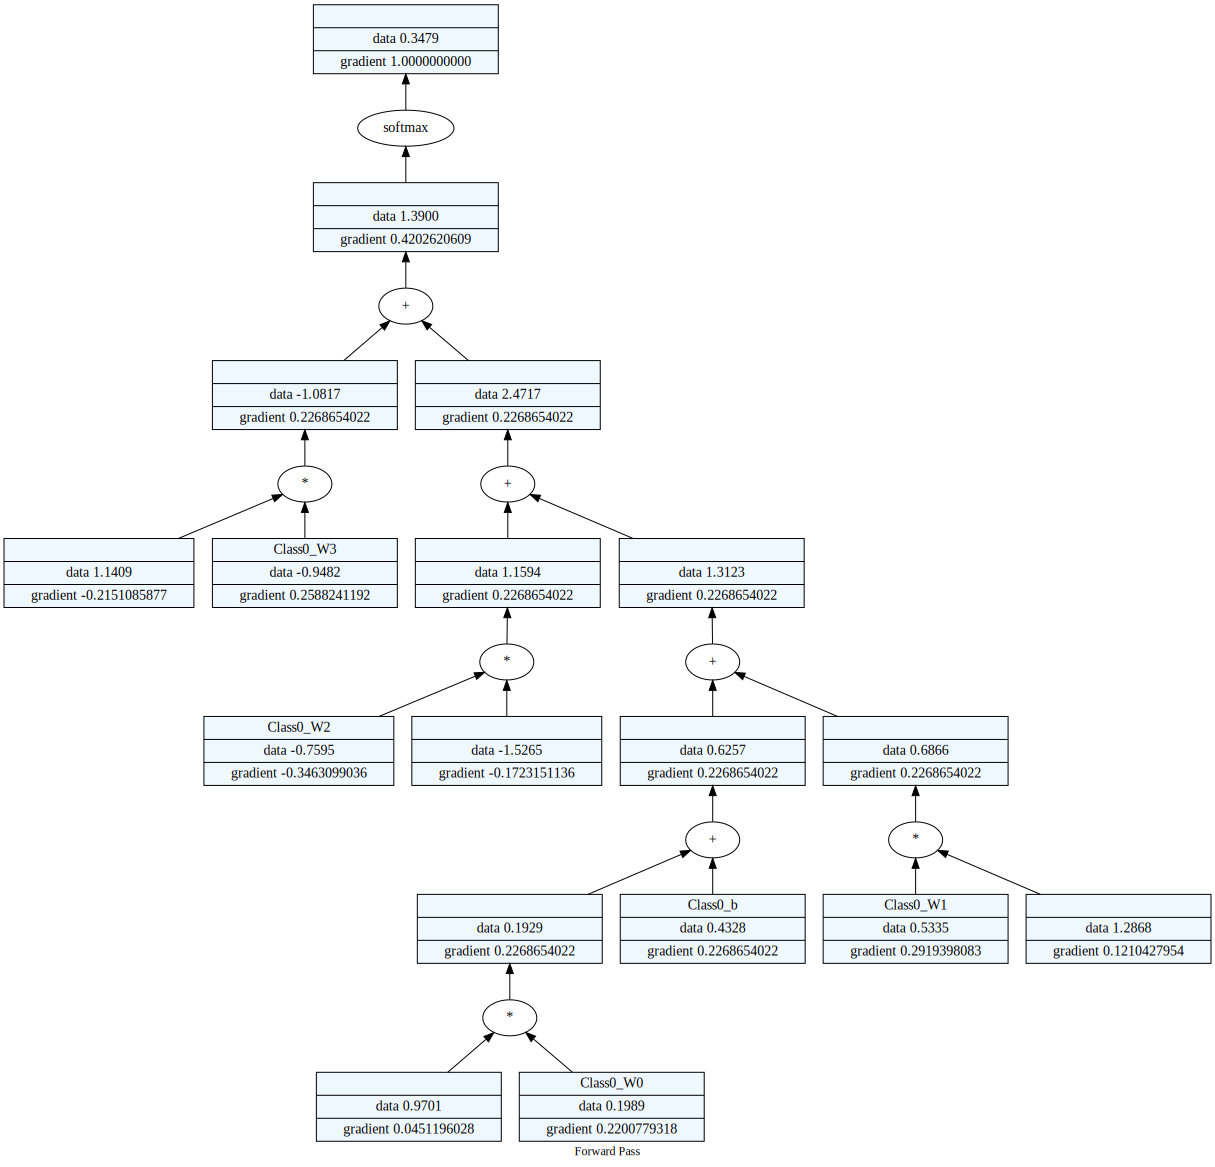

In [8]:
output[0].__draw__()

In [9]:
import numpy as np

# Given values
w = np.array([[i.data for i in w] for w in W])
b = np.array([b.data for b in B])

# Calculate softmax
scores = np.dot(w, x) + b
softmax_output = np.exp(scores) / np.sum(np.exp(scores))

# Compute gradients
grad_w = np.outer(softmax_output - (np.arange(len(softmax_output)) == y), x)
grad_b = softmax_output - (np.arange(len(softmax_output)) == y)

# Display gradients
print("Gradient with respect to weights (w_ij):")
print(grad_w)

print("\nGradient with respect to biases (b_i):")
print(grad_b)


Gradient with respect to weights (w_ij):
[[ 0.33749076  0.44769135 -0.5310682   0.39690826]
 [ 0.18460176  0.24487963 -0.29048536  0.21710213]
 [ 0.35671137  0.47318805 -0.56131334  0.41951278]
 [-0.87880388 -1.16575904  1.38286691 -1.03352317]]

Gradient with respect to biases (b_i):
[ 0.34789938  0.1902951   0.36771278 -0.90590726]


In [10]:
X.shape

(1000, 4)

In [11]:
lr = LogisticRegression(input_dim = 4, multiclass=True, k =4)

In [12]:
lr.fit(X[:800], Y[:800], learning_rate=0.008, batch_size=32, num_epochs = 300, optimizer='SGD')

Epoch 0, Loss: 81.07431833730875
Epoch 10, Loss: 91.16912547235648
Epoch 20, Loss: 69.73602104916685
Epoch 30, Loss: 75.83860274764082
Epoch 40, Loss: 78.60186190485435
Epoch 50, Loss: 58.32922845032585
Epoch 60, Loss: 69.93290331111858
Epoch 70, Loss: 61.4276342036458
Epoch 80, Loss: 70.81393020202277
Epoch 90, Loss: 59.76973261965908
Epoch 100, Loss: 48.94819971834599
Epoch 110, Loss: 73.14179412219089
Epoch 120, Loss: 43.00798393242963
Epoch 130, Loss: 49.18268141692027
Epoch 140, Loss: 55.69788474718433
Epoch 150, Loss: 53.67222589266374
Epoch 160, Loss: 48.47868763810423
Epoch 170, Loss: 47.25110287641986
Epoch 180, Loss: 49.99422560049485
Epoch 190, Loss: 42.53176361334735
Epoch 200, Loss: 51.38298363610188
Epoch 210, Loss: 36.278852474765294
Epoch 220, Loss: 40.04375689594388
Epoch 230, Loss: 41.272885426268644
Epoch 240, Loss: 43.24960920864216
Epoch 250, Loss: 35.18534185959935
Epoch 260, Loss: 37.791132846186734
Epoch 270, Loss: 34.1868855422324
Epoch 280, Loss: 28.6942468657

In [14]:
preds = lr.predict(X[800:])
preds = [np.argmax([p.data for p in pred]) for pred in preds]

In [5]:
lr = LogisticRegression(input_dim = 4, multiclass=True, k =4)

In [6]:
lr.fit(X[:800], Y[:800], learning_rate=0.008, batch_size=32, num_epochs = 300, optimizer='BGD')

Epoch 0, Loss: 53.71129854704273
Epoch 10, Loss: 48.88102657934536
Epoch 20, Loss: 23.34234298423466
Epoch 30, Loss: 15.898546456634348
Epoch 40, Loss: 3.0075667857817017
Epoch 50, Loss: 2.8297574080701082
Epoch 60, Loss: 1.2415196262230646
Epoch 70, Loss: 0.5900850292514715
Epoch 80, Loss: 0.6627662693870057
Epoch 90, Loss: 0.44935983052457223
Epoch 100, Loss: 0.12262303438577081
Epoch 110, Loss: 0.43796229647473517
Epoch 120, Loss: 0.38872620361285365
Epoch 130, Loss: 1.1813791209892823
Epoch 140, Loss: 1.5634844804224965
Epoch 150, Loss: 0.8862904461667767
Epoch 160, Loss: 0.3566703064205724
Epoch 170, Loss: 0.22849872864495682
Epoch 180, Loss: 0.45158373497035087
Epoch 190, Loss: 0.04267095442999643
Epoch 200, Loss: 0.3006136340823523
Epoch 210, Loss: 0.36653778518221813
Epoch 220, Loss: 0.06974068210803483
Epoch 230, Loss: 0.08980866629412908
Epoch 240, Loss: 0.0009159411962315885
Epoch 250, Loss: 0.0018669293384263614
Epoch 260, Loss: 0.0015251858687633359
Epoch 270, Loss: 0.0247

In [7]:
lr.parameters()

[[Variable(data=-10.560938097123438),
  Variable(data=-14.458326415117547),
  Variable(data=5.75816023704746),
  Variable(data=-13.995076310677788)],
 [Variable(data=-18.596200275226185),
  Variable(data=-10.937106970771609),
  Variable(data=-3.048307653059457),
  Variable(data=3.183089245868038)],
 [Variable(data=9.314059652499303),
  Variable(data=8.33461896368385),
  Variable(data=11.305006537409922),
  Variable(data=-0.022561734978002096)],
 [Variable(data=9.683473556063802),
  Variable(data=8.02139872400368),
  Variable(data=-14.063168546528837),
  Variable(data=11.593552377669369)],
 [Variable(data=9.196825199386188),
  Variable(data=21.776875062813776),
  Variable(data=9.080142522144934),
  Variable(data=9.214857705329152)]]

In [8]:
preds = lr.predict(X[800:])
preds = [np.argmax([p.data for p in pred]) for pred in preds]

In [9]:
from sklearn.metrics import classification_report
print(classification_report(Y[800:], preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [17]:
# lr.__draw__(X[0])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create and fit a linear regression/ model
model = LogisticRegression()
model.fit(X[:800], Y[:800])

/home/ramin/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [12]:
model.coef_

array([[-0.87353517, -2.1613209 ,  1.57028562, -2.96182219],
       [-1.94066341, -0.51916577, -0.82111993,  1.45651658],
       [ 1.49110297,  1.43820487,  1.69897776, -0.1790372 ],
       [ 1.32309561,  1.2422818 , -2.44814345,  1.68434281]])

In [20]:
preds = model.predict(X[800:])

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y[800:], preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

